<a href="https://colab.research.google.com/github/SonaliBanapuram/ML_Assignment2/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research paper: "Advanced Machine Learning Based Malware Detection Systems".**

Identify the Research Gap for Improvement

While the paper “Advanced Machine Learning Based Malware Detection Systems” effectively explores the use of compact data learning and multiple machine learning algorithms for malware classification, several research gaps remain. The study primarily focuses on accuracy improvement but gives limited attention to hyperparameter optimization and model interpretability, which are essential for understanding and trusting predictions in real-world applications. Additionally, feature selection and dimensionality reduction methods are not comprehensively compared, leaving uncertainty about which features contribute most to detection performance. The research also relies on static analysis features, overlooking dynamic behavioral patterns that could enhance robustness against evolving malware. Lastly, the scalability of the proposed system to large, real-time datasets and cross-platform environments remains untested. Addressing these gaps can lead to a more optimized, interpretable, and adaptive malware detection framework.

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [ ]:
df = pd.read_csv("/content/Permission Dataset.csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

First 5 rows:
    permission.GetuiService.com.glodon.ynjtapp  permission.COLLECT_METRICS  \
0                                           0                           0   
1                                           0                           0   
2                                           0                           0   
3                                           0                           0   
4                                           0                           0   

   permission.sec.MDM_PHONE_RESTRICTION  permission.MEDIA_MOUNTED  \
0                                     0                         0   
1                                     0                         0   
2                                     0                         0   
3                                     0                         0   
4                                     0                         0   

   permission.USAGE_ACCESS_SETTINGS  permission.VOIP_BROADCAST_VOIP_INTENTS  \
0                           

In [ ]:
print("\nDataset Info:")
df.info()
print("\nMissing values:", df.isnull().sum().sum())
print("\nClass Distribution:\n", df['class'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11975 entries, 0 to 11974
Columns: 1491 entries, permission.GetuiService.com.glodon.ynjtapp to class
dtypes: int64(1491)
memory usage: 136.2 MB

Missing values: 0

Class Distribution:
 class
1    6000
0    5975
Name: count, dtype: int64


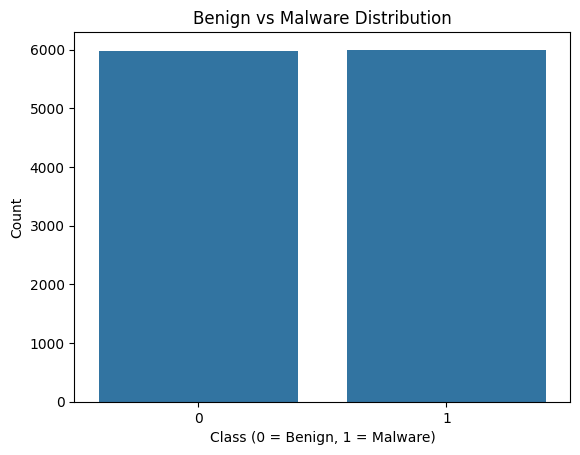

In [ ]:
sns.countplot(x=df['class'])
plt.title("Benign vs Malware Distribution")
plt.xlabel("Class (0 = Benign, 1 = Malware)")
plt.ylabel("Count")
plt.show()


Data Preprocessing

In [ ]:
# Drop irrelevant identifiers if any
df = df.drop(columns=['AppName','Hash','PackageName'], errors='ignore')
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']
# Feature scaling (optional but helps for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Drop irrelevant identifiers if any
df = df.drop(columns=['AppName','Hash','PackageName'], errors='ignore')
X = df.drop('class', axis=1)
y = df['class']
print("Class distribution:\n", y.value_counts())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nScaled feature matrix shape:", X_scaled.shape)


Class distribution:
 class
1    6000
0    5975
Name: count, dtype: int64

Scaled feature matrix shape: (11975, 1490)


Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (9580, 1490) | Test shape: (2395, 1490)


Baseline Model

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Baseline Accuracy: 0.918580375782881

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1195
           1       0.93      0.90      0.92      1200

    accuracy                           0.92      2395
   macro avg       0.92      0.92      0.92      2395
weighted avg       0.92      0.92      0.92      2395



Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=3, n_jobs=-1, verbose=2
)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Evaluation after Tuning

Tuned Model Accuracy: 0.9181628392484342

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1195
           1       0.93      0.90      0.92      1200

    accuracy                           0.92      2395
   macro avg       0.92      0.92      0.92      2395
weighted avg       0.92      0.92      0.92      2395



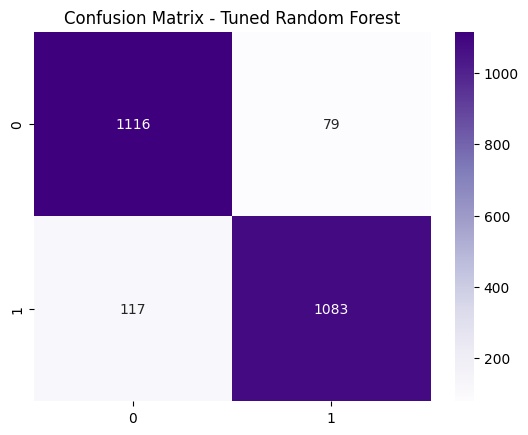

In [ ]:
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

Comparison with Another Model

In [17]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.902713987473904


Feature Importance

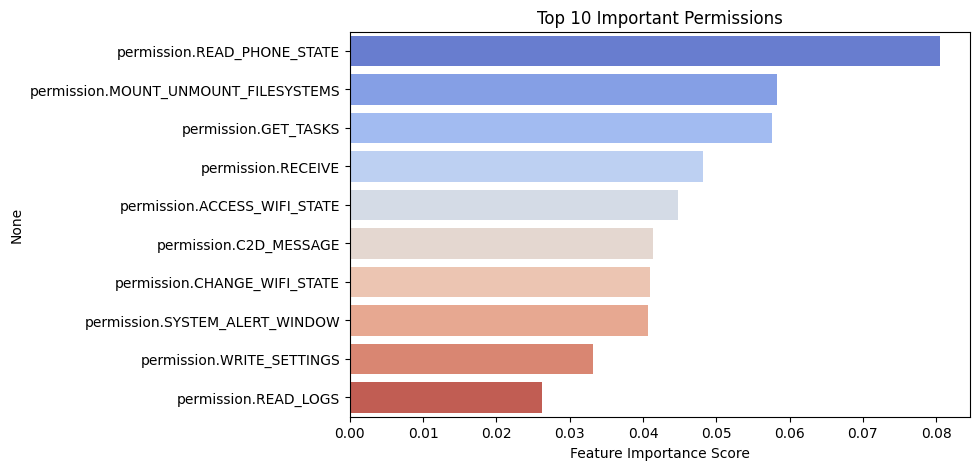

In [18]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top10 = importances.nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top10.values, y=top10.index, palette="coolwarm")
plt.title("Top 10 Important Permissions")
plt.xlabel("Feature Importance Score")
plt.show()